In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Handling missing values, outliers


In [11]:
# Load dataset
placement_data_df = pd.read_csv('Placement_Data_Full_Class.csv')

# 1. Handle missing values
# Impute missing values for salary with median
placement_data_df['salary'] = placement_data_df['salary'].fillna(placement_data_df['salary'].median())

# Dropping rows where 'status' is missing since it's important
placement_data_df = placement_data_df.dropna(subset=['status'])

# 2. Encoding categorical variables
# Label Encoding for binary categories
label_encoder = LabelEncoder()
placement_data_df['gender'] = label_encoder.fit_transform(placement_data_df['gender'])  # 0: Female, 1: Male
placement_data_df['workex'] = label_encoder.fit_transform(placement_data_df['workex'])  # 0: No, 1: Yes
placement_data_df['status'] = label_encoder.fit_transform(placement_data_df['status'])  # 0: Not Placed, 1: Placed

# One-Hot Encoding for multi-category columns
data = pd.get_dummies(placement_data_df, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'], drop_first=True)

# 3. Handle outliers
# Select only numeric columns for outlier detection
numeric_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows that are outliers in any numeric column
data = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

# 4. Feature scaling
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Now 'data' is preprocessed and ready for PCA or any other analysis.


# Encoding

# Perform PCA

Principal Component 1: 0.3315 (0.3315 cumulative)
Principal Component 2: 0.1340 (0.4655 cumulative)
Principal Component 3: 0.1188 (0.5843 cumulative)
Principal Component 4: 0.1093 (0.6936 cumulative)
Principal Component 5: 0.0783 (0.7719 cumulative)
Principal Component 6: 0.0604 (0.8324 cumulative)
Principal Component 7: 0.0453 (0.8777 cumulative)
Principal Component 8: 0.0386 (0.9163 cumulative)
Principal Component 9: 0.0272 (0.9435 cumulative)
Principal Component 10: 0.0211 (0.9646 cumulative)
Principal Component 11: 0.0148 (0.9794 cumulative)
Principal Component 12: 0.0128 (0.9922 cumulative)
Principal Component 13: 0.0051 (0.9973 cumulative)
Principal Component 14: 0.0027 (1.0000 cumulative)


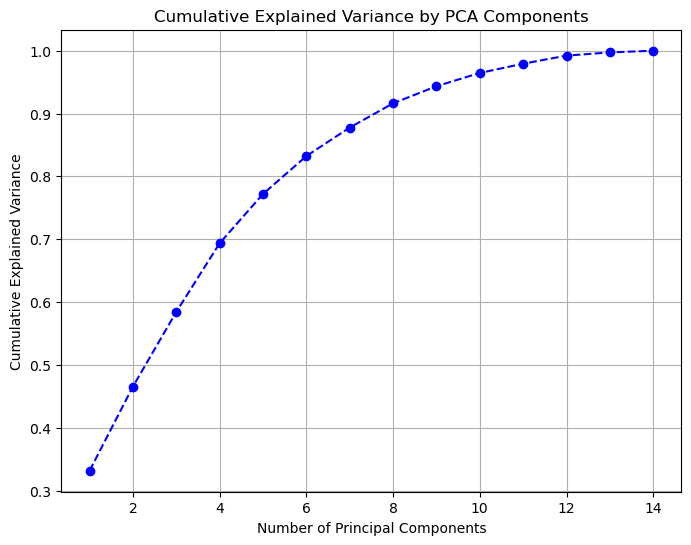

Number of components explaining 90% variance: 8


In [12]:


# Assuming the preprocessed data is stored in a variable called 'data'
# Drop target variables (if any) before applying PCA
X = data.drop(columns=['sl_no', 'status', 'salary'])  # 'sl_no', 'status', and 'salary' are not used for PCA

# 1. Perform PCA
pca = PCA(n_components=None)  # None keeps all components
X_pca = pca.fit_transform(X)

# 2. Explained variance ratio (proportion of variance explained by each principal component)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance for each component
for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# 3. Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 4. Choose the number of components (e.g., to explain 90% variance)
# You can select the number of components based on the explained variance plot
# Example: choose components that explain at least 90% of the variance
n_components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components_90_variance}")

# 5. Reduce data to selected components
pca = PCA(n_components=n_components_90_variance)
X_reduced = pca.fit_transform(X)

# Now 'X_reduced' contains the reduced dataset based on selected principal components
